## Загрузим датасет с xor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import category_scatter, plot_decision_regions

In [2]:
data = pd.read_csv('../data/xor.csv', sep=';')
x_train, x_test, y_train, y_test = train_test_split(data[['X', 'Y']], data['class'], train_size=0.8, random_state=1)

### Задача

Задать параметры модели: ограничить глубину дерева до трех. Посмотреть на качество модели на обучающей выборке и на тестовой 

In [3]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [4]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

train_accuracy = accuracy_score(train_prediction, y_train)
test_accuracy = accuracy_score(test_prediction, y_test)

print('Точность на обучающей выборке: ', train_accuracy)
print('Точность на тестовой выборке: ', test_accuracy)

Точность на обучающей выборке:  0.95
Точность на тестовой выборке:  0.93


Text(0, 0.5, 'Y')

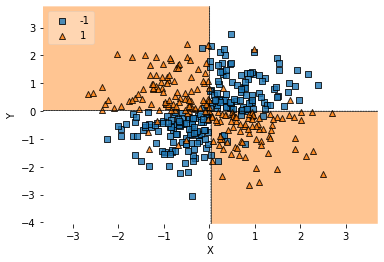

In [5]:
plot_decision_regions(x_train.values, y_train.values.astype(int), clf=model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

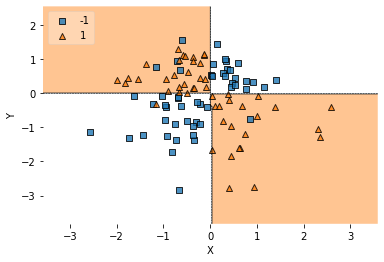

In [6]:
plot_decision_regions(x_test.values, y_test.values.astype(int), clf=model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')

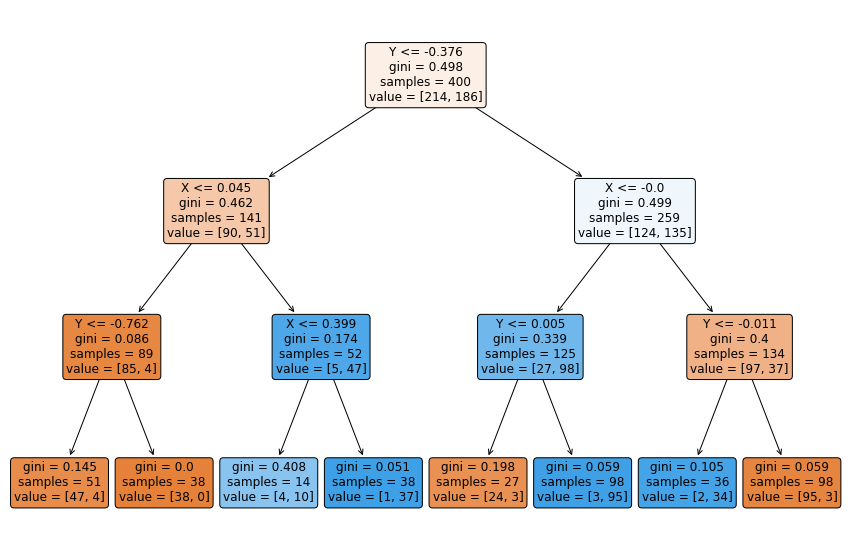

In [7]:
plt.figure(figsize=(15,10))  
plot_tree(model, feature_names = x_test.columns, 
             filled=True, fontsize=12, rounded = True)
plt.show()

### Задача
Оценить качество, используя кросс-валидацию

In [8]:
from sklearn.model_selection import cross_validate, cross_val_score

scoring = ['accuracy']
clf = DecisionTreeClassifier(max_depth=3)
scores = cross_validate(clf, data[['X', 'Y']], data['class'], cv=7,
                        scoring=scoring, return_train_score=True)

In [9]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy
0,0.001499,0.000684,0.902778,0.953271
1,0.001097,0.000604,0.833333,0.817757
2,0.001007,0.000609,0.847222,0.962617
3,0.001058,0.000597,0.985915,0.939394
4,0.001134,0.000649,0.929577,0.946387
5,0.001439,0.000730,0.985915,0.939394
6,0.001037,0.000571,0.957746,0.944056


### Задача 

Вспомним задачу с цифрами с предыдущего урока. Необходимо взять датасет с цифрами, обучить на них дерево решений и логистическую регрессию. 

Проверить гипотезу о том, что логистическая регрессия в среднем работает лучше на этих данных, чем решающее дерево, с уровнем значимости 0.05.

В качестве данных использовать данные по кросс-валидации на 10 фолдах.

In [10]:
import scipy.stats


from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [11]:
data = load_digits()
x = data.data
y = data.target
x = (x - x.mean()) / x.std()

In [12]:
lr = LogisticRegression(max_iter=1000)
sample1 = cross_val_score(lr, x, y, cv=10)

dt = DecisionTreeClassifier()
sample2 = cross_val_score(dt, x, y, cv=10)

$H0:$ точность моделей в среднем равна

$H1:$ логистическая регрессия в среднем дает лучший результат

`ttest_ind` проверяет двустороннюю альтернативу, поэтому мы должны оказаться в правом хвосте распределения и полученный pvalue нужно будет разделить на 2.

In [13]:
stat, pval = scipy.stats.ttest_ind(sample1, sample2)

print(stat, pval)

if stat > 0 and pval / 2 < 0.05:
    print('H1 справедлива, логистическая регрессия работает лучше')
else:
    print('H0 справедлива, модели работают одинаково')

6.230725741393183 7.050350861567841e-06
H1 справедлива, логистическая регрессия работает лучше


## Задача

Посчитать precision и recall для модели дерева решений и для логистической регрессии

In [14]:
lr = LogisticRegression(max_iter=1000)
sample1 = cross_validate(lr, x_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'])

dt = DecisionTreeClassifier()
sample2 = cross_validate(dt, x_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'])

/Users/sabzero43/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
pd.DataFrame(sample1)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.002215,0.002416,0.400000,0.105263,0.166667,0.5000
1,0.001874,0.002044,0.666667,0.216216,0.326531,0.5875
2,0.001583,0.002222,0.428571,0.162162,0.235294,0.5125
3,0.001958,0.003008,0.000000,0.000000,0.000000,0.5375
4,0.001757,0.002106,0.687500,0.297297,0.415094,0.6125


In [16]:
pd.DataFrame(sample2)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.001134,0.002251,0.852941,0.763158,0.805556,0.8250
1,0.001056,0.002041,0.837838,0.837838,0.837838,0.8500
2,0.001062,0.002017,0.944444,0.918919,0.931507,0.9375
3,0.001023,0.001992,0.942857,0.891892,0.916667,0.9250
4,0.001035,0.002031,0.942857,0.891892,0.916667,0.9250


### Задача

С помощью k-fold валидации обучить модель случайного леса и сравнить его качество с предыдущими моделями

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
dt = RandomForestClassifier()
sample3 = cross_validate(dt, x_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'])

In [19]:
pd.DataFrame(sample3)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.073020,0.006778,0.921053,0.921053,0.921053,0.9250
1,0.070164,0.007042,0.888889,0.864865,0.876712,0.8875
2,0.069392,0.006387,0.921053,0.945946,0.933333,0.9375
3,0.068756,0.006437,0.918919,0.918919,0.918919,0.9250
4,0.068822,0.006398,0.944444,0.918919,0.931507,0.9375
